# WordCloud
* 公式サイト：https://amueller.github.io/word_cloud/
* 文章の中に含まれる単語をカウントして、どのような単語が多く含まれるかを視覚的に表現します。
* 英語の場合は、単語間にスペースがあるので、解析が簡単ですが、日本語の場合はオリジナルの文章から単語間がスペースで区切られた「分かち書き」の状態に変換する作業が必要になります。
* カラーマップは以下のものが利用できます。  
  * https://matplotlib.org/stable/tutorials/colors/colormaps.html
  * 例：'viridis', 'plasma', 'inferno', 'magma', 'cividis'

##ライブラリのインストールと読み込み

In [1]:
# janome をインストール（GoogleColab にはデフォルトでは入っていない）
!pip3 install janome

# 「IPA」フォントをインストール
!apt-get -y install fonts-ipafont-gothic
FONT_PATH = '/usr/share/fonts/truetype/fonts-japanese-gothic.ttf'

# ライブラリの読み込み
import numpy as np
import matplotlib.pyplot as plt
import wordcloud
from janome.tokenizer import Tokenizer
from PIL import Image
import requests
import io

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 38.6 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 16 not upgraded.
Need to get 8,237 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-ipafont-gothic all 00303-21ubuntu1 [3,513 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-ipafont-mincho all 00303-21ubuntu1 [4,724 kB]
Fetched 8,237 kB in 0s (20.8 MB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 120831 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-21ubuntu1_all.deb ...
Unpacking fonts-ipafon

## WordCloud｜English

### テキストデータの準備

In [2]:
# テキストデータ　https://en.wikipedia.org/wiki/Python_(programming_language)

text_en = """Python is an interpreted high-level general-purpose programming language. Its design philosophy emphasizes code readability with its use of significant indentation. Its language constructs as well as its object-oriented approach aim to help programmers write clear, logical code for small and large-scale projects.Python is dynamically-typed and garbage-collected. It supports multiple programming paradigms, including structured (particularly, procedural), object-oriented and functional programming. It is often described as a "batteries included" language due to its comprehensive standard library.Guido van Rossum began working on Python in the late 1980s, as a successor to the ABC programming language, and first released it in 1991 as Python 0.9.0. Python 2.0 was released in 2000 and introduced new features, such as list comprehensions and a cycle-detecting garbage collection system (in addition to reference counting). Python 3.0 was released in 2008 and was a major revision of the language that is not completely backward-compatible. Python 2 was discontinued with version 2.7.18 in 2020.Python consistently ranks as one of the most popular programming languages."""

### ベーシックなスタイル

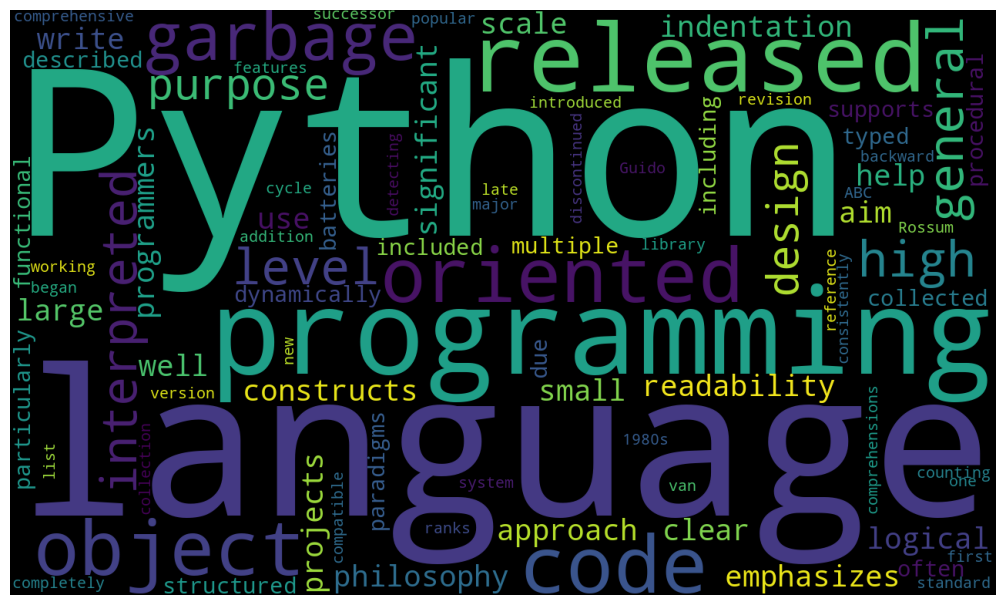

In [3]:
# WordCloud の生成
wc_en = wordcloud.WordCloud( width = 1280, height = 760, background_color = "black" , colormap='viridis')
wc_en.generate( text_en )

# WordCloud の表示
plt.figure( figsize=(12.8,7.6))
plt.imshow( wc_en )
plt.axis( 'off')
plt.show()

### 形状マスクの利用

In [4]:
# マスク画像の読み込み
img_url = 'https://github.com/koichi-inoue/DataScience/raw/main/circle.png'
mask_img = np.array( Image.open(io.BytesIO(requests.get(img_url).content)) )


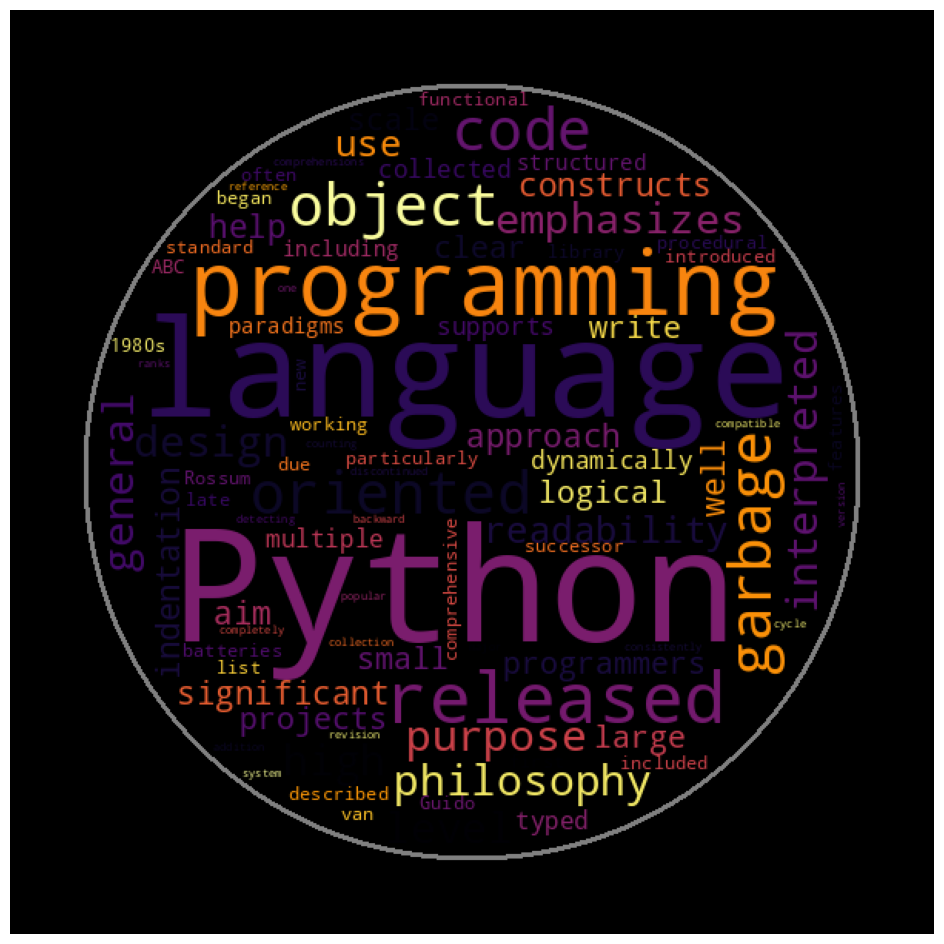

In [5]:
# WordCloud の生成
wc_en = wordcloud.WordCloud( width = 600, height = 600, background_color = "black" , colormap='inferno' ,  mask = mask_img,  contour_width=2, contour_color='gray' )
wc_en.generate( text_en )

# WordCloud の表示
plt.figure( figsize=(12, 12) )
plt.imshow( wc_en )
plt.axis( 'off')
plt.show()

## WordCloud｜日本語

In [6]:
# テキストデータ　https://www.aozora.gr.jp/cards/000148/files/776_14941.html

text_jp = """山路を登りながら、こう考えた。智に働けば角が立つ。情に棹させば流される。意地を通せば窮屈だ。とかくに人の世は住みにくい。住みにくさが高じると、安い所へ引き越したくなる。どこへ越しても住みにくいと悟った時、詩が生れて、画が出来る。人の世を作ったものは神でもなければ鬼でもない。やはり向う三軒両隣りにちらちらするただの人である。ただの人が作った人の世が住みにくいからとて、越す国はあるまい。あれば人でなしの国へ行くばかりだ。人でなしの国は人の世よりもなお住みにくかろう。越す事のならぬ世が住みにくければ、住みにくい所をどれほどか、寛容て、束の間の命を、束の間でも住みよくせねばならぬ。ここに詩人という天職が出来て、ここに画家という使命が降る。あらゆる芸術の士は人の世を長閑にし、人の心を豊かにするが故に尊とい。"""

In [7]:
# 日本語を分解

tk = Tokenizer()
text_jp_wakati = tk.tokenize( text_jp , wakati=True )


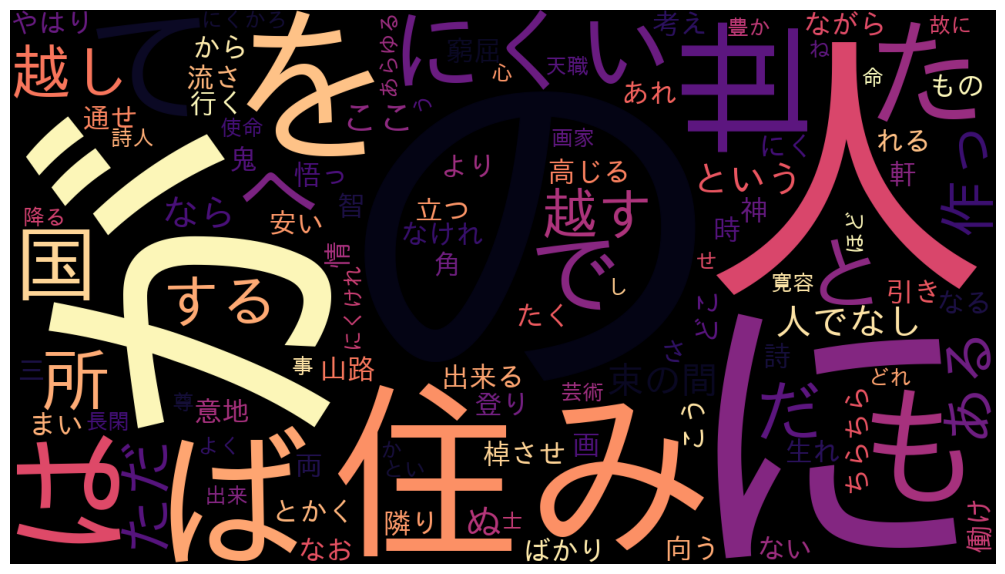

In [8]:
# WordCloud の生成
wc_jp = wordcloud.WordCloud( width= 1280 , height =720, background_color = 'black' , font_path = FONT_PATH , colormap = 'magma' )
wc_jp.generate( " ".join(text_jp_wakati))

# WordCloud の表示
plt.figure( figsize=(12.8,7.2))
plt.imshow( wc_jp )
plt.axis( 'off')
plt.show()